# NYC Yellow Taxi Trip Exploration

Analysis is part of the 4th semsester course Database Technologies. Where Students analysie a choosen dataset.

### Daten
- TLC Trip Recrod Data from 2022 yellow taxi trips
    - Explanation: https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf  
- Taxi Zone Lookup Table
- Taxi Zone Shapefile
Link: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

Zurzeit waren für 2022 nur Daten bis März verfügabr.
Daten wurde über AWS-cli heruntergeladen:

`aws s3 cp --no-sign-request s3://nyc-tlc/trip\ data/yellow_tripdata_2022-01.parquet .`  
`aws s3 cp --no-sign-request s3://nyc-tlc/trip\ data/yellow_tripdata_2022-02.parquet .`  
`aws s3 cp --no-sign-request s3://nyc-tlc/trip\ data/yellow_tripdata_2022-03.parquet .`  

Datenformat: Umstellung auf parquet



Yellow Taxi?
- Yellow taxicabs are the iconic, yellow vehicles that have the right to pick up street-hailing passengers anwhere in New York City. 
- https://www1.nyc.gov/site/tlc/vehicles/get-a-vehicle-license.page

### Explanation of the Attributes

1. `VendorID` - von welchem Provider kommen die Daten
    - 1=Createive Mobile Technologies LLC; 2=VeriFone Inc.
2. `tpep_pickup_datetime` - datetime when the meter was engaged
3. `tpep_dropoff_datetime` - datetime wehn the meter was disengaged
4. `passenger_count` - number of passengers (enterd by driver)
5. `trip_distance` - miles reported by the taximeter
6. `PULocationID` - TLC Taxi Zone (where the taximeter was engaged)
7. `DOLocationID` - TLC Taxi Zone (where the taximeter was disengaged)
8. `RateCodeID` - final rate code in effect at the end of the trip
    - 1=Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride
9. `store_and_fwd_flag` - when record was not send immediately, and held in vehicle memory
    - Y=store and forward trip, N=not a store and forward
10. `payment_type` - numeric code signifiying how the passenger paid of the trip
    - 0=Credit card, 1=Cash, 2=No charge, 3=Dispute, 4=Unkown, 5=Voided trip
11. `fare_amount` - The time-and-distance fare calculated by the meter
12. `extra` - Miscelleneous extras and surcharges. $0.5 and $1 rush hour and overnight charges
13. `mTA_tax` - $0.5 MTA tax that is automatically tiggered
14. `improvement_surcharge` - $0.3 imporvement surcharge assessed trips at the flag drop 
15. `tip_amount` - automatically populated for credit card tips. Cash tips are not included
16. `tolls_amount` - Maut gebühren
17. `total_amount` - total amount charged to passengers. Does not include chash tips.
18. `congestion_Surcharge` - Stauzuschlag
19. `airport_fee` $1.25 for pick up only at LaGuardia and John F. Kennedy Airpors

### Imports

In [1]:
import pandas as pd
# turn off truncating display option
pd.set_option('display.max_columns', None)
import numpy as np

### Libs for viszalization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Einlesen der Daten

In [2]:
# See related data
!ls | grep 'yellow*'

yellow_tripdata_2022-01.parquet
yellow_tripdata_2022-02.parquet
yellow_tripdata_2022-03.parquet


In [3]:
# read data into a pandas DataFrame
df_01 = pd.read_parquet("yellow_tripdata_2022-01.parquet", engine='pyarrow')
df_02 = pd.read_parquet("yellow_tripdata_2022-02.parquet", engine='pyarrow')
df_03 = pd.read_parquet("yellow_tripdata_2022-03.parquet", engine='pyarrow')

df_list = [df_01, df_02, df_03]

### Data Understanding

In [4]:
for df in df_list:
    df.info()
    print('#'*30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [5]:
for df in df_list:
    print(df.shape[1])

19
19
19


In [6]:
df_01.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [7]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3627877,2,2022-03-31 23:45:00,2022-04-01 00:01:00,NaN,3.57,NaN,None,48,262,0,18.33,0.0,0.5,1.00,0.0,0.3,22.63,NaN,NaN
3627878,2,2022-03-31 23:59:39,2022-04-01 00:06:09,NaN,2.04,NaN,None,48,238,0,9.75,0.0,0.5,2.00,0.0,0.3,15.05,NaN,NaN
3627879,2,2022-03-31 23:50:00,2022-04-01 00:08:00,NaN,0.59,NaN,None,48,4,0,17.33,0.0,0.5,2.23,0.0,0.3,22.86,NaN,NaN
3627880,2,2022-03-31 23:25:56,2022-03-31 23:32:37,NaN,1.26,NaN,None,158,68,0,8.80,0.0,0.5,2.57,0.0,0.3,14.67,NaN,NaN
3627881,2,2022-03-31 23:08:00,2022-03-31 23:17:00,NaN,1.66,NaN,None,112,256,0,8.80,0.0,0.5,1.82,0.0,0.3,11.42,NaN,NaN


In [8]:
df_01['passenger_count'].value_counts()

1.0    1794055
2.0     343026
3.0      84570
0.0      52061
5.0      51338
4.0      35321
6.0      32037
7.0          9
8.0          8
9.0          3
Name: passenger_count, dtype: int64

In [9]:
df_01['RatecodeID'].value_counts()

1.0     2296363
2.0       66623
5.0       13561
99.0       8732
3.0        4014
4.0        3118
6.0          17
Name: RatecodeID, dtype: int64

In [10]:
df_01['store_and_fwd_flag'].value_counts()

N    2337496
Y      54932
Name: store_and_fwd_flag, dtype: int64

In [11]:
df_01['payment_type'].value_counts()

1    1874874
2     495171
0      71503
3      11709
4      10673
5          1
Name: payment_type, dtype: int64

#### Data Understanding Summary
- `passenger_count` and `RatecodeID` should be an int   
- the columns are the same so we can concatinate the dataframe to create one dataframe
- there are missing values
- `PULocationID` and `DOLocationID` are keys for zones in a different table provided by TLC
    - make a left join to have more context what each zone number means
- Yellow Trips Data Dictionary doesn't fit the data
    - `payment_type` starts with 0, not with 1 
    - 99 encoding in `RatecodeID`
- Use pickup and dropoff time to calculate duration

### Preprocessing
- concat DFs
- join data
- change data type
- calculate trip duration 
- calculate average speed from duration and distance

#### CONCAT DataFrames
- Erstellen von einem eizelnen Datansatz mit allen drei Monaten

In [12]:
# before concat check if columns are equal
if not (df_01.columns == df_02.columns).all() and (df_01.columns == df_03.columns).all():
    print("Columns are different")

In [13]:
df_full = pd.concat(df_list)

In [14]:
df_full

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3627877,2,2022-03-31 23:45:00,2022-04-01 00:01:00,NaN,3.57,NaN,None,48,262,0,18.33,0.0,0.5,1.00,0.0,0.3,22.63,NaN,NaN
3627878,2,2022-03-31 23:59:39,2022-04-01 00:06:09,NaN,2.04,NaN,None,48,238,0,9.75,0.0,0.5,2.00,0.0,0.3,15.05,NaN,NaN
3627879,2,2022-03-31 23:50:00,2022-04-01 00:08:00,NaN,0.59,NaN,None,48,4,0,17.33,0.0,0.5,2.23,0.0,0.3,22.86,NaN,NaN
3627880,2,2022-03-31 23:25:56,2022-03-31 23:32:37,NaN,1.26,NaN,None,158,68,0,8.80,0.0,0.5,2.57,0.0,0.3,14.67,NaN,NaN


In [15]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071244 entries, 0 to 3627881
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [16]:
# delte variables for each dataframe to free up memory
del df_01
del df_02
del df_03
del df_list

#### JOIN with Taxi Zones
- on PULocationID
- on DOLocationID

In [17]:
df_taxi_zone = pd.read_csv("taxi+_zone_lookup.csv")

In [18]:
df_taxi_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [19]:
df_taxi_zone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [20]:
df_full.PULocationID

0          142
1          236
2          166
3          114
4           68
          ... 
3627877     48
3627878     48
3627879     48
3627880    158
3627881    112
Name: PULocationID, Length: 9071244, dtype: int64

In [21]:
df_merge_location = pd.merge(df_full, df_taxi_zone, left_on="PULocationID", right_on="LocationID", how="left")

In [22]:
df_merge_location[["PULocationID", "LocationID"]]

,PULocationID,LocationID
0,142,142
1,236,236
2,166,166
3,114,114
4,68,68
...,...,...
9071239,48,48
9071240,48,48
9071241,48,48
9071242,158,158


In [23]:
# check for equality
# when true, then merge was sucessful
df_merge_location["PULocationID"].equals(df_merge_location["LocationID"])

True

In [24]:
# rename new columns
df_merge_location.rename(columns={'Borough': 'PULocation_Borough', 'Zone': 'PULocation_Zone', 'service_zone': 'PULocation_service_zone'}, inplace=True)

In [25]:
# drop LocationID
df_merge_location.drop("LocationID", axis=1, inplace=True)

In [26]:
df_merge_location.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'PULocation_Borough', 'PULocation_Zone', 'PULocation_service_zone'],
      dtype='object')

##### Merge with DOLocationID for dropoff

In [27]:
df_merge_location = pd.merge(df_merge_location, df_taxi_zone, left_on="DOLocationID", right_on="LocationID", how="left")

In [ ]:
df_merge_location.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'PULocation_Borough', 'PULocation_Zone', 'PULocation_service_zone',
       'LocationID', 'Borough', 'Zone', 'service_zone'],
      dtype='object')

In [28]:
df_merge_location["DOLocationID"].equals(df_merge_location["LocationID"])

True

In [29]:
df_merge_location.rename(columns={'Borough': 'DOLocation_Borough', 'Zone': 'DOLocation_Zone', 'service_zone': 'DOLocation_service_zone'}, inplace=True)
df_merge_location.drop("LocationID", axis=1, inplace=True)

In [30]:
df_merge_location.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'PULocation_Borough', 'PULocation_Zone', 'PULocation_service_zone',
       'DOLocation_Borough', 'DOLocation_Zone', 'DOLocation_service_zone'],
      dtype='object')

In [31]:
del df_full

#### Transform Columns to int
- `passenger_count` and `RatecodeID` should be int
- to convert to int I need to fill NaN's 
    - used 99 to indicate missing vlaues

In [32]:
df_merge_location['passenger_count'] = df_merge_location['passenger_count'].fillna(99)
df_merge_location['passenger_count'] = df_merge_location['passenger_count'].astype('int64')
df_merge_location['RatecodeID'] = df_merge_location['RatecodeID'].fillna(99)
df_merge_location['RatecodeID'] = df_merge_location['RatecodeID'].astype('int64')

In [33]:
df_merge_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071244 entries, 0 to 9071243
Data columns (total 25 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   VendorID                 int64         
 1   tpep_pickup_datetime     datetime64[ns]
 2   tpep_dropoff_datetime    datetime64[ns]
 3   passenger_count          int64         
 4   trip_distance            float64       
 5   RatecodeID               int64         
 6   store_and_fwd_flag       object        
 7   PULocationID             int64         
 8   DOLocationID             int64         
 9   payment_type             int64         
 10  fare_amount              float64       
 11  extra                    float64       
 12  mta_tax                  float64       
 13  tip_amount               float64       
 14  tolls_amount             float64       
 15  improvement_surcharge    float64       
 16  total_amount             float64       
 17  congestion_surcharge     fl

#### Calculate trip duration

In [34]:
df_merge_location['trip_duration'] = df_merge_location.tpep_dropoff_datetime - df_merge_location.tpep_pickup_datetime 

In [35]:
df_merge_location[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration']].head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration
0,2022-01-01 00:35:40,2022-01-01 00:53:29,0 days 00:17:49
1,2022-01-01 00:33:43,2022-01-01 00:42:07,0 days 00:08:24
2,2022-01-01 00:53:21,2022-01-01 01:02:19,0 days 00:08:58
3,2022-01-01 00:25:21,2022-01-01 00:35:23,0 days 00:10:02
4,2022-01-01 00:36:48,2022-01-01 01:14:20,0 days 00:37:32
5,2022-01-01 00:40:15,2022-01-01 01:09:48,0 days 00:29:33
6,2022-01-01 00:20:50,2022-01-01 00:34:58,0 days 00:14:08
7,2022-01-01 00:13:04,2022-01-01 00:22:45,0 days 00:09:41
8,2022-01-01 00:30:02,2022-01-01 00:44:49,0 days 00:14:47
9,2022-01-01 00:48:52,2022-01-01 00:53:28,0 days 00:04:36


In [36]:
df_merge_location['trip_duration'][0].total_seconds()

1069.0

In [37]:
df_merge_location['trip_duration_sec'] = df_merge_location.trip_duration.dt.total_seconds()

#### Transfrom miles to km

In [38]:
df_merge_location['trip_distance_km'] = df_merge_location['trip_distance'] * 1.6

#### Calculate average speed

In [39]:
df_merge_location['average_speed_km/h'] = df_merge_location.trip_distance_km / (df_merge_location.trip_duration_sec)*60*60

#### Save final Dataset

In [40]:
# Save DataFrame to parquet
df_merge_location.to_parquet("NYC_full_data.parpuet")

#### Reload the data

I have used multiple variables to hold various different versions of the data (proprocessing) so in the next step I will free those and relaod the final data.

In [37]:
# clear all variables to free up memory space
%reset

In [1]:
# relaod imports after reset
import pandas as pd
# turn off truncating display option
pd.set_option('display.max_columns', None)
import numpy as np

### Libs for viszalization
import matplotlib#
import matplotlib.pyplot as plt#

import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df = pd.read_parquet("NYC_full_data.parpuet")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071244 entries, 0 to 9071243
Data columns (total 29 columns):
 #   Column                   Dtype          
---  ------                   -----          
 0   VendorID                 int64          
 1   tpep_pickup_datetime     datetime64[ns] 
 2   tpep_dropoff_datetime    datetime64[ns] 
 3   passenger_count          int64          
 4   trip_distance            float64        
 5   RatecodeID               int64          
 6   store_and_fwd_flag       object         
 7   PULocationID             int64          
 8   DOLocationID             int64          
 9   payment_type             int64          
 10  fare_amount              float64        
 11  extra                    float64        
 12  mta_tax                  float64        
 13  tip_amount               float64        
 14  tolls_amount             float64        
 15  improvement_surcharge    float64        
 16  total_amount             float64        
 17  congesti

### Quality Check
- check missing values
- check outliers

#### Missing Values

In [40]:
row_count = df.shape[0]

print("row = count missing values")
for row in df.columns:
    count_nans = df[row].isnull().sum()
    if count_nans != 0:
        relative_nans = (count_nans / row_count) * 100
        print(f"{row}: {count_nans}, relative: {relative_nans:.4f}%")
    # I encoded missing vales in passenger_count and RatecodeID with 99
    if row == "passenger_count" or row == "RatecodeID":
        count_nans = (df[row] == 99).sum()
        relative_nans = (count_nans / row_count) * 100
        print(f"{row}: {count_nans}, relative: {relative_nans:.4f}%")


row = count missing values
passenger_count: 291055, relative: 3.2085%
RatecodeID: 323532, relative: 3.5666%
store_and_fwd_flag: 291055, relative: 3.2085%
congestion_surcharge: 291055, relative: 3.2085%
airport_fee: 291055, relative: 3.2085%
PULocation_Zone: 24777, relative: 0.2731%
PULocation_service_zone: 112268, relative: 1.2376%
DOLocation_Zone: 26708, relative: 0.2944%
DOLocation_service_zone: 96575, relative: 1.0646%
average_speed_km/h: 3290, relative: 0.0363%


Maximal 3.56% of missing values in `RatecodeID`.   
Interessant, dass die Columns `passenger_count`, `store_and_fwd_flag`, `congestion_surcharge` and `airport_fee` die gleiche Anzahl von NaNs haben: 291055  
**Question**: are these the same rows?


- `store_and_fwd_flag`
    - when RatecodeID missing is then is store_and_fwd_flag also missing



I am relatively sure that the missing vales in `DOLocation` means that the dropoff was outside of NYC

##### Haben die gleichen rows die fehelenden Werte?

In [41]:
ids_passenger_count_nan = set(df[df['passenger_count'].isna()].index)
ids_store_and_fwd_flag_nan = set(df[df['store_and_fwd_flag'].isna()].index)
ids_congestion_surcharge_nan = set(df[df['congestion_surcharge'].isna()].index)
ids_airport_fee_nan = set(df[df['airport_fee'].isna()].index)


In [42]:
print(ids_passenger_count_nan.difference(ids_store_and_fwd_flag_nan))
print(ids_passenger_count_nan.difference(ids_congestion_surcharge_nan))
print(ids_passenger_count_nan.difference(ids_airport_fee_nan))

set()
set()
set()


They seem to have missing values in the same rows. So I know that something went wrong and I can drop the specific rows

In [3]:
# drop missing values
# nur da wo alle NaNs haben
df.dropna(subset=['passenger_count', 'store_and_fwd_flag', 'congestion_surcharge', 'airport_fee'], inplace=True)

In [15]:
print(f"rows removed: {row_count - df.shape[0]}")

rows removed: 291055


In [44]:
print("row = count missing values")
for row in df.columns:
    count_nans = df[row].isnull().sum()
    if count_nans != 0:
        relative_nans = (count_nans / row_count) * 100
        print(f"{row}: {count_nans}, relative: {relative_nans:.4f}%")
    # I encoded missing vales in passenger_count and RatecodeID with 99
    if row == "passenger_count" or row == "RatecodeID":
        count_nans = (df[row] == 99).sum()
        relative_nans = (count_nans / row_count) * 100
        print(f"{row}: {count_nans}, relative: {relative_nans:.4f}%")

row = count missing values
passenger_count: 0, relative: 0.0000%
RatecodeID: 32477, relative: 0.3580%
PULocation_Zone: 4299, relative: 0.0474%
PULocation_service_zone: 90901, relative: 1.0021%
DOLocation_Zone: 25611, relative: 0.2823%
DOLocation_service_zone: 94708, relative: 1.0440%
average_speed_km/h: 3199, relative: 0.0353%


##### RatecodeID

In [10]:
df[df['RatecodeID'] == 99]['trip_distance_km'].value_counts()

0.000     6356
3.360      278
2.560      273
2.720      272
3.040      271
          ... 
66.240       1
72.160       1
55.040       1
1.584        1
0.032        1
Name: trip_distance_km, Length: 350, dtype: int64

0 is the most commen number in trip_distance when 99 was entered

In [11]:
df['trip_distance'].value_counts().sort_index()

0.00        97401
0.01         6065
0.02         4155
0.03         3320
0.04         2563
            ...  
622.00          1
651.00          1
1212.24         1
7170.55         1
53440.55        1
Name: trip_distance, Length: 5458, dtype: int64

97401 rides have a recodes distance of 0. It could be that the passengers as negotiated a fixed ammount

In [12]:
df['RatecodeID'].value_counts()

1     8407017
2      264023
5       48974
99      32477
3       16999
4       10628
6          71
Name: RatecodeID, dtype: int64

In [13]:
df[df['RatecodeID'] == 5]['trip_distance'].value_counts()

0.00     26262
0.01       892
0.02       491
0.03       491
0.10       455
         ...  
53.41        1
26.57        1
35.75        1
56.50        1
28.38        1
Name: trip_distance, Length: 3881, dtype: int64

When a Trip has a negotiated fare then the most commen value for trip_distance is 0. This could mean that the taximeter wasn't engaged to track the trip.

In [14]:
df[df['RatecodeID'] == 5]['fare_amount'].value_counts(bins=4)

(2.5, 451.25]                    46064
(-446.25, 2.5]                    2870
(451.25, 900.0]                     36
(-896.7959999999999, -446.25]        4
Name: fare_amount, dtype: int64

In [15]:
print(df[df['RatecodeID'] == 5]['total_amount'].mean())
print(df['total_amount'].mean())

66.85984277371665
19.669297785047693


The average price paid, when the fare is negotiated, is higher then the avererage total_amount

##### PULocation and DOLocation

In [19]:
df[df['PULocation_Zone'].isna()]['PULocationID'].value_counts()

265    4299
Name: PULocationID, dtype: int64

In [20]:
df[df['DOLocation_Zone'].isna()]['DOLocationID'].value_counts()

265    25611
Name: DOLocationID, dtype: int64

In [21]:
df[df['DOLocation_service_zone'].isna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocation_Borough,PULocation_Zone,PULocation_service_zone,DOLocation_Borough,DOLocation_Zone,DOLocation_service_zone,trip_duration,trip_duration_sec,trip_distance_km,average_speed_km/h
102,1,2022-01-01 00:54:05,2022-01-01 00:54:44,1,0.10,1,N,265,265,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,0.00,Unknown,None,None,Unknown,None,None,0 days 00:00:39,39.0,0.160,14.769231
154,2,2022-01-01 00:26:37,2022-01-01 00:39:35,1,7.38,1,N,132,265,4,-21.0,-0.5,-0.5,0.00,0.0,-0.3,-23.55,0.0,-1.25,Queens,JFK Airport,Airports,Unknown,None,None,0 days 00:12:58,778.0,11.808,54.638560
155,2,2022-01-01 00:26:37,2022-01-01 00:39:35,1,7.38,1,N,132,265,2,21.0,0.5,0.5,0.00,0.0,0.3,23.55,0.0,1.25,Queens,JFK Airport,Airports,Unknown,None,None,0 days 00:12:58,778.0,11.808,54.638560
219,2,2022-01-01 00:52:54,2022-01-01 01:25:57,1,21.75,1,N,219,265,1,58.0,0.5,0.5,11.86,0.0,0.3,71.16,0.0,0.00,Queens,Springfield Gardens South,Boro Zone,Unknown,None,None,0 days 00:33:03,1983.0,34.800,63.177005
523,2,2022-01-01 00:59:33,2022-01-01 01:14:09,4,5.37,5,N,50,265,2,-75.0,0.0,0.0,0.00,0.0,-0.3,-77.80,-2.5,0.00,Manhattan,Clinton West,Yellow Zone,Unknown,None,None,0 days 00:14:36,876.0,8.592,35.309589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8953197,2,2022-03-31 23:50:33,2022-04-01 00:07:19,1,9.91,1,N,132,265,2,28.0,0.5,0.5,0.00,0.0,0.3,30.55,0.0,1.25,Queens,JFK Airport,Airports,Unknown,None,None,0 days 00:16:46,1006.0,15.856,56.741153
8953231,2,2022-03-31 23:24:28,2022-03-31 23:47:57,2,3.27,1,N,163,264,1,14.5,3.0,0.5,0.00,0.0,0.3,18.30,0.0,0.00,Manhattan,Midtown North,Yellow Zone,Unknown,NV,None,0 days 00:23:29,1409.0,5.232,13.367779
8953244,2,2022-03-31 23:55:25,2022-03-31 23:55:29,1,0.00,5,N,264,264,1,40.0,0.0,0.5,0.00,0.0,0.3,40.80,0.0,0.00,Unknown,NV,None,Unknown,NV,None,0 days 00:00:04,4.0,0.000,0.000000
8953267,2,2022-03-31 23:23:20,2022-04-01 00:15:12,1,48.77,4,N,90,265,1,119.0,0.5,0.5,36.84,0.0,0.3,159.64,2.5,0.00,Manhattan,Flatiron,Yellow Zone,Unknown,None,None,0 days 00:51:52,3112.0,78.032,90.268380


#### Outlier 
- as seen above there are certain outliers in the dataset
- check min and max values for each numeric row

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8780189 entries, 0 to 8953429
Data columns (total 29 columns):
 #   Column                   Dtype          
---  ------                   -----          
 0   VendorID                 int64          
 1   tpep_pickup_datetime     datetime64[ns] 
 2   tpep_dropoff_datetime    datetime64[ns] 
 3   passenger_count          int64          
 4   trip_distance            float64        
 5   RatecodeID               int64          
 6   store_and_fwd_flag       object         
 7   PULocationID             int64          
 8   DOLocationID             int64          
 9   payment_type             int64          
 10  fare_amount              float64        
 11  extra                    float64        
 12  mta_tax                  float64        
 13  tip_amount               float64        
 14  tolls_amount             float64        
 15  improvement_surcharge    float64        
 16  total_amount             float64        
 17  congesti

In [16]:
# statistics for each numeric and datetime rows
# list with relevant columns
num_rows_list = ["passenger_count", "trip_distance", "trip_distance_km", "trip_duration", "trip_duration_sec", "average_speed_km/h",  "fare_amount", "extra", "mta_tax", "tip_amount", 
                "improvement_surcharge", "total_amount", "congestion_surcharge", "airport_fee", 'tpep_pickup_datetime', 'tpep_dropoff_datetime']

In [17]:
# mean, min, max
for row in num_rows_list:
    print(f"{row}: min: {df[row].min()}, max: {df[row].max()}")

passenger_count: min: 0, max: 9
trip_distance: min: 0.0, max: 53440.55
trip_distance_km: min: 0.0, max: 85504.88
trip_duration: min: -50 days +04:00:04, max: 5 days 21:53:11
trip_duration_sec: min: -4305596.0, max: 510791.00000000006
average_speed_km/h: min: -0.13107134557285616, max: inf
fare_amount: min: -895.0, max: 401092.32
extra: min: -4.5, max: 33.5
mta_tax: min: -0.5, max: 17.1
tip_amount: min: -188.0, max: 888.88
improvement_surcharge: min: -0.3, max: 0.3
total_amount: min: -895.3, max: 401095.62
congestion_surcharge: min: -2.5, max: 2.75
airport_fee: min: -1.25, max: 1.25
tpep_pickup_datetime: min: 2003-01-01 00:10:06, max: 2022-05-24 17:41:50
tpep_dropoff_datetime: min: 2003-01-01 12:38:59, max: 2022-05-24 17:43:27


There are some interesting data here:
- tirp duration over 5 days
- average_speed_km/h: inf
- negative: fare_amounts and totals
- very high total amount of 401095.62
- min pickup and dropoff date from 2003 
- max pickup and dropoff from May, which should not be possible 

In [31]:
df[df["average_speed_km/h"] == np.inf]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocation_Borough,PULocation_Zone,PULocation_service_zone,DOLocation_Borough,DOLocation_Zone,DOLocation_service_zone,trip_duration,trip_duration_sec,trip_distance_km,average_speed_km/h
5613,1,2022-01-01 01:42:30,2022-01-01 01:42:30,2,1.30,1,N,263,263,1,6.0,3.00,0.5,1.20,0.00,0.3,11.00,2.5,0.00,Manhattan,Yorkville West,Yellow Zone,Manhattan,Yorkville West,Yellow Zone,0 days,0.0,2.080,inf
20962,1,2022-01-01 10:41:05,2022-01-01 10:41:05,3,1.80,1,N,161,161,1,7.5,2.50,0.5,2.15,0.00,0.3,12.95,2.5,0.00,Manhattan,Midtown Center,Yellow Zone,Manhattan,Midtown Center,Yellow Zone,0 days,0.0,2.880,inf
33362,2,2022-01-01 14:15:15,2022-01-01 14:15:15,1,0.08,2,N,264,264,3,-52.0,0.00,-0.5,0.00,0.00,-0.3,-52.80,0.0,0.00,Unknown,NV,None,Unknown,NV,None,0 days,0.0,0.128,inf
33363,2,2022-01-01 14:15:15,2022-01-01 14:15:15,1,0.08,2,N,264,264,2,52.0,0.00,0.5,0.00,0.00,0.3,52.80,0.0,0.00,Unknown,NV,None,Unknown,NV,None,0 days,0.0,0.128,inf
35343,1,2022-01-01 15:45:09,2022-01-01 15:45:09,2,1.50,1,N,164,164,1,9.0,2.50,0.5,2.45,0.00,0.3,14.75,2.5,0.00,Manhattan,Midtown South,Yellow Zone,Manhattan,Midtown South,Yellow Zone,0 days,0.0,2.400,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640670,2,2022-03-29 14:17:15,2022-03-29 14:17:15,1,0.04,5,N,230,264,1,65.0,0.00,0.0,10.00,0.00,0.0,75.00,0.0,0.00,Manhattan,Times Sq/Theatre District,Yellow Zone,Unknown,NV,None,0 days,0.0,0.064,inf
8709888,1,2022-03-30 04:41:24,2022-03-30 04:41:24,1,17.90,2,N,132,132,2,52.0,3.75,0.5,0.00,6.55,0.3,63.10,2.5,1.25,Queens,JFK Airport,Airports,Queens,JFK Airport,Airports,0 days,0.0,28.640,inf
8890349,2,2022-03-31 15:36:15,2022-03-31 15:36:15,1,0.06,5,N,230,264,1,69.0,0.00,0.0,13.80,0.00,0.0,82.80,0.0,0.00,Manhattan,Times Sq/Theatre District,Yellow Zone,Unknown,NV,None,0 days,0.0,0.096,inf
8899314,2,2022-03-31 00:00:00,2022-03-31 00:00:00,1,2.26,1,N,43,229,1,13.5,1.00,0.5,0.89,0.00,0.3,18.69,2.5,0.00,Manhattan,Central Park,Yellow Zone,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,0 days,0.0,3.616,inf


In [130]:
df[df["trip_duration_sec"] == 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocation_Borough,PULocation_Zone,PULocation_service_zone,DOLocation_Borough,DOLocation_Zone,DOLocation_service_zone,trip_duration,trip_duration_sec,trip_distance_km,average_speed_km/h
1760,1,2022-01-01 00:36:35,2022-01-01 00:36:35,1,0.0,1,N,132,264,2,115.0,1.75,0.5,0.0,0.0,0.3,117.55,0.0,1.25,Queens,JFK Airport,Airports,Unknown,NV,None,0 days,0.0,0.00,NaN
3156,2,2022-01-01 00:04:59,2022-01-01 00:04:59,1,0.0,1,N,264,264,2,2.5,0.50,0.5,0.0,0.0,0.3,3.80,0.0,0.00,Unknown,NV,None,Unknown,NV,None,0 days,0.0,0.00,NaN
4726,1,2022-01-01 01:59:36,2022-01-01 01:59:36,1,0.0,1,N,237,264,2,2.5,3.00,0.5,0.0,0.0,0.3,6.30,2.5,0.00,Manhattan,Upper East Side South,Yellow Zone,Unknown,NV,None,0 days,0.0,0.00,NaN
5612,1,2022-01-01 01:38:42,2022-01-01 01:38:42,2,0.0,1,N,141,264,2,6.0,3.00,0.5,0.0,0.0,0.3,9.80,2.5,0.00,Manhattan,Lenox Hill West,Yellow Zone,Unknown,NV,None,0 days,0.0,0.00,NaN
5613,1,2022-01-01 01:42:30,2022-01-01 01:42:30,2,1.3,1,N,263,263,1,6.0,3.00,0.5,1.2,0.0,0.3,11.00,2.5,0.00,Manhattan,Yorkville West,Yellow Zone,Manhattan,Yorkville West,Yellow Zone,0 days,0.0,2.08,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8929649,1,2022-03-31 20:32:20,2022-03-31 20:32:20,2,0.0,1,N,237,264,2,6.0,3.00,0.5,0.0,0.0,0.3,9.80,2.5,0.00,Manhattan,Upper East Side South,Yellow Zone,Unknown,NV,None,0 days,0.0,0.00,NaN
8930841,1,2022-03-31 20:19:03,2022-03-31 20:19:03,1,0.0,1,N,234,264,2,2.5,3.00,0.5,0.0,0.0,0.3,6.30,2.5,0.00,Manhattan,Union Sq,Yellow Zone,Unknown,NV,None,0 days,0.0,0.00,NaN
8940288,1,2022-03-31 21:59:42,2022-03-31 21:59:42,1,0.0,5,N,140,264,2,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,Manhattan,Lenox Hill East,Yellow Zone,Unknown,NV,None,0 days,0.0,0.00,NaN
8945073,1,2022-03-31 22:04:05,2022-03-31 22:04:05,1,0.0,1,N,188,264,2,14.0,0.50,0.5,0.0,0.0,0.3,15.30,0.0,0.00,Brooklyn,Prospect-Lefferts Gardens,Boro Zone,Unknown,NV,None,0 days,0.0,0.00,NaN


In [129]:
df['average_speed_km/h'].describe()

count    8.776990e+06
mean              inf
std               NaN
min     -1.310713e-01
25%      1.294382e+01
50%      1.676190e+01
75%      2.253301e+01
max               inf
Name: average_speed_km/h, dtype: float64

In [80]:
df_trip_distance = df["trip_distance"].value_counts().sort_index()
df_trip_distance = df_trip_distance.reset_index()
df_trip_distance.rename(columns={'index': 'value'}, inplace=True)

In [90]:
df['trip_distance_km'].describe()

count    8.780189e+06
mean     5.091773e+00
std      2.988083e+01
min      0.000000e+00
25%      1.712000e+00
50%      2.848000e+00
75%      5.120000e+00
max      8.550488e+04
Name: trip_distance_km, dtype: float64

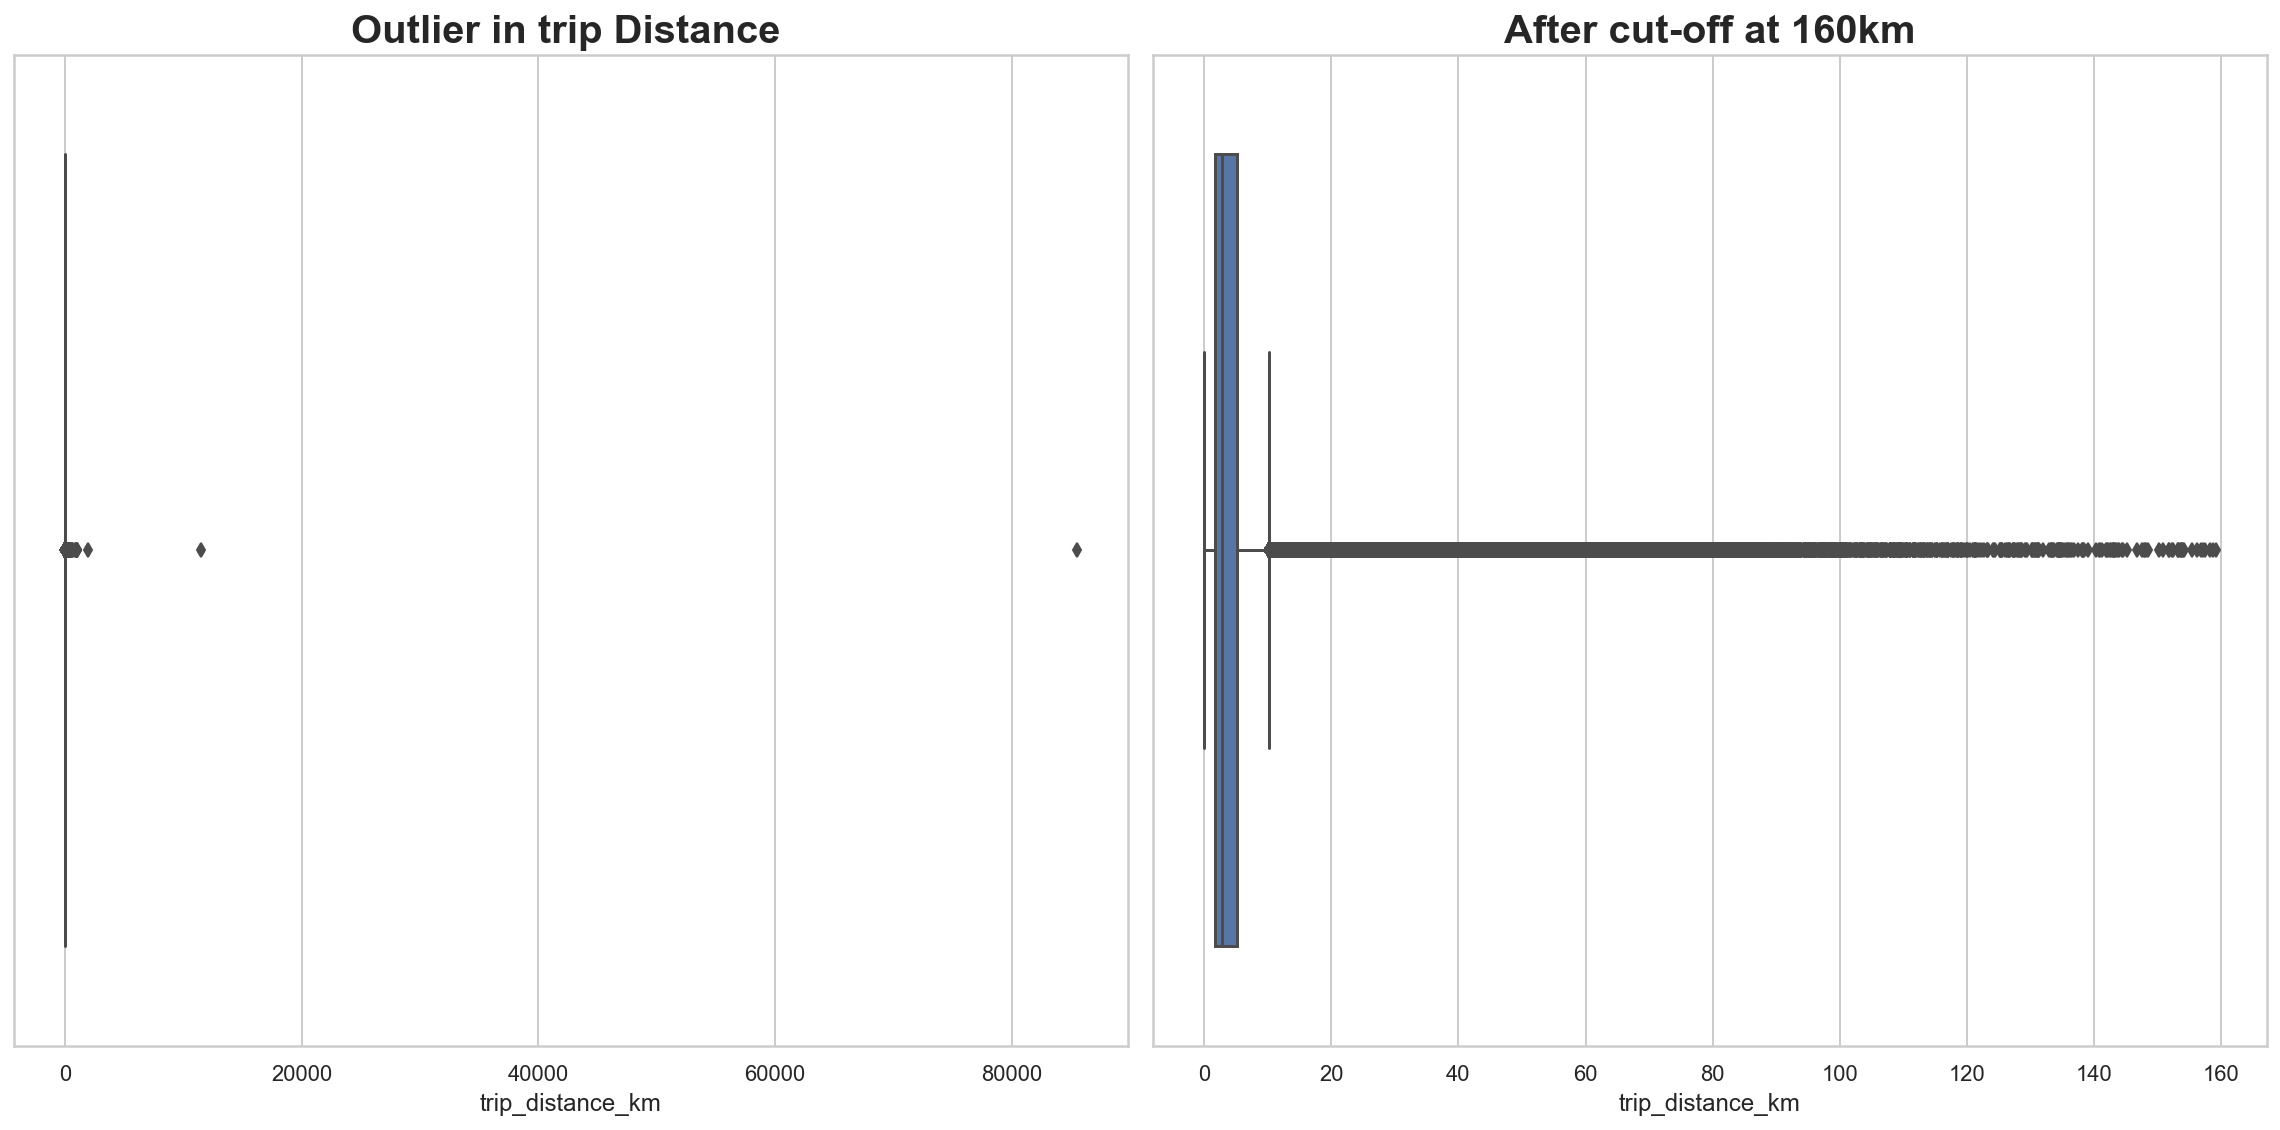

In [15]:
sns.set_theme(style="whitegrid")
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
axis1 = sns.boxplot(x=df['trip_distance_km'], ax=axis1)
axis2 = sns.boxplot(x=df[df['trip_distance_km'] <= 160]['trip_distance_km'], ax=axis2)

axis1.set_title(f'Outlier in trip Distance ', fontsize= '20', weight='bold')
axis2.set_title(f'After cut-off at 160km', fontsize= '20', weight='bold')
plt.tight_layout()

<AxesSubplot:xlabel='trip_distance_km'>

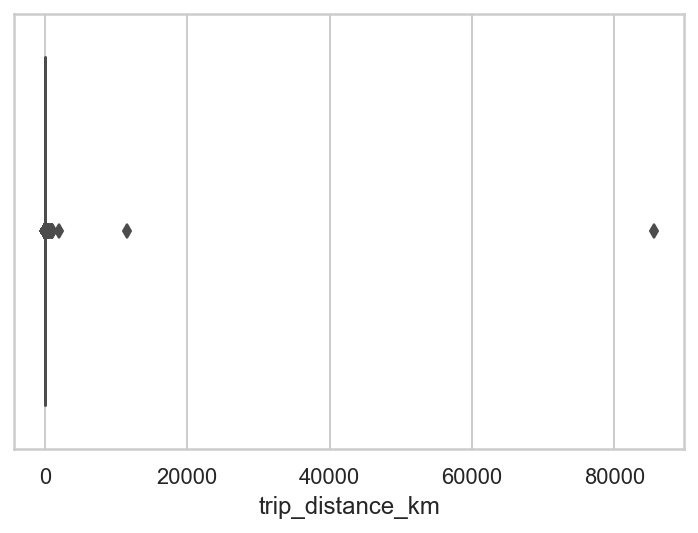

In [92]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df['trip_distance_km'])

<AxesSubplot:xlabel='trip_distance_km'>

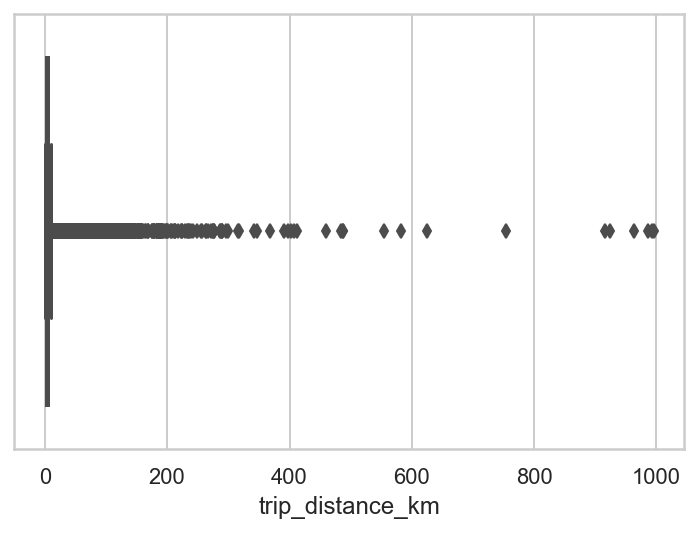

In [91]:
sns.boxplot(x=df[df['trip_distance_km'] <= 1000]['trip_distance_km'])

In [ ]:
# cut of at maximum (Q3 + 1.5*IQR)
Q1 = df_trip_distance['value']


In [51]:
df["total_amount"].value_counts().sort_index()

-895.30       1
-600.30       1
-556.85       1
-500.29       1
-480.30       1
             ..
 900.30       1
 1141.20      1
 1228.95      1
 1783.85      1
 401095.62    1
Name: total_amount, Length: 14171, dtype: int64

<AxesSubplot:xlabel='total_amount'>

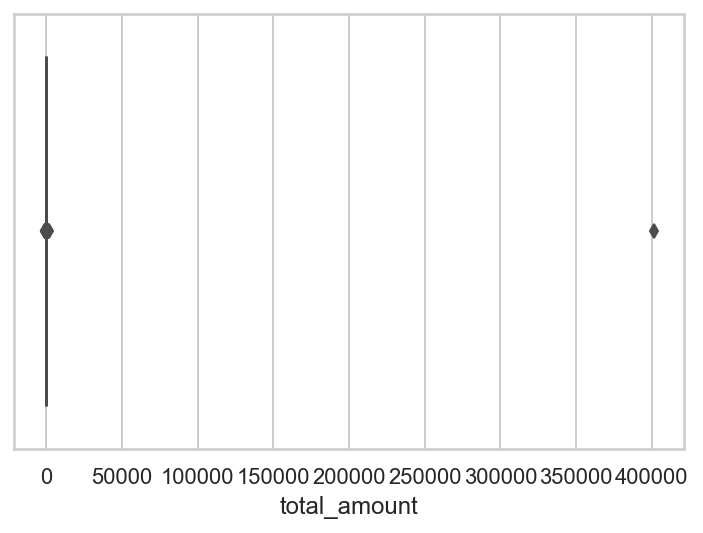

In [52]:
sns.boxplot(x=df['total_amount'])

In [58]:
# how many are below 0
df_total_amount = df["total_amount"].value_counts().sort_index()

In [62]:
df_total_amount = df_total_amount.reset_index()

In [69]:
df_total_amount.rename(columns={'index': 'value'}, inplace=True)

In [74]:
df_total_amount[df_total_amount['value'] <= 0]

,value,total_amount
0,-895.30,1
1,-600.30,1
2,-556.85,1
3,-500.29,1
4,-480.30,1
...,...,...
1170,-0.78,1
1171,-0.35,3
1172,-0.31,5
1173,-0.30,21


In [77]:
df_total_amount[df_total_amount['value'] >= 250].head(20)

,value,total_amount
13485,250.00,1
13486,250.30,29
13487,250.32,2
13488,250.38,1
13489,250.55,1
13490,250.60,1
13491,250.80,3
13492,250.96,1
13493,251.00,3
13494,251.05,1


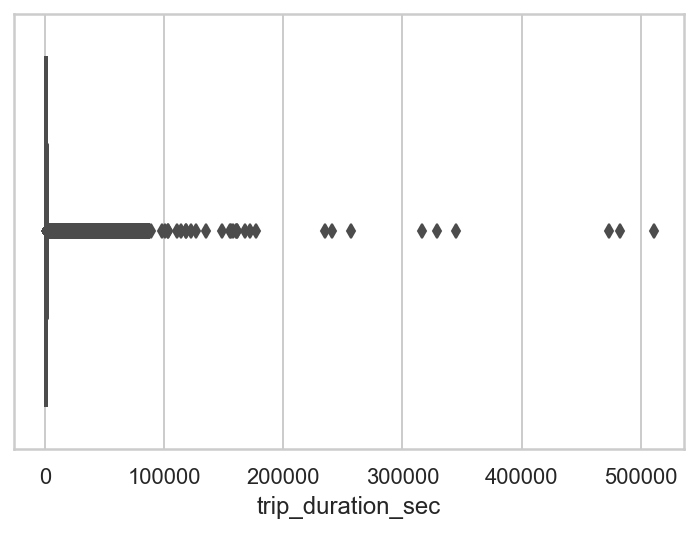

In [109]:
ax = sns.boxplot(x=df[df['trip_duration_sec'] >= 0]['trip_duration_sec'])

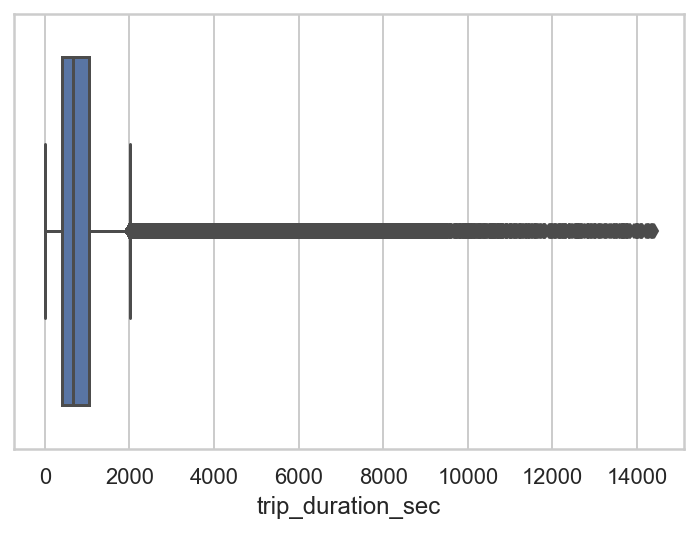

In [110]:
# 14400 sec = 240min = 4h
ax = sns.boxplot(x=df[(df.trip_duration_sec >= 0) & (df.trip_duration_sec <= 14400)]['trip_duration_sec'])

<AxesSubplot:xlabel='total_amount'>

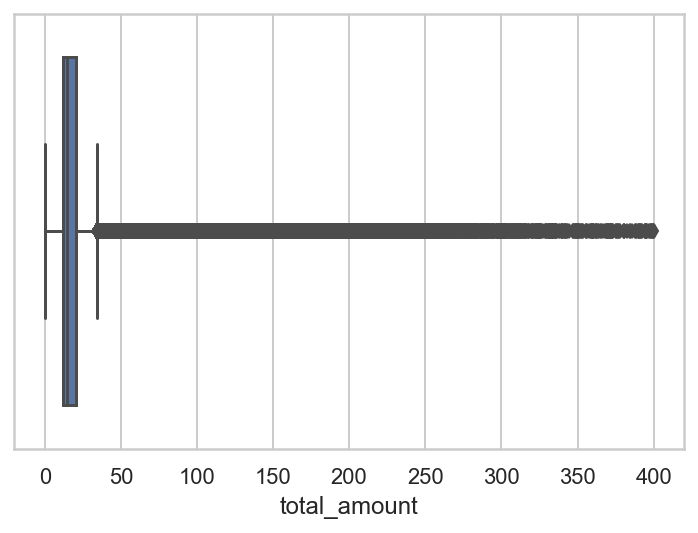

In [125]:
sns.boxplot(x=df[(df.total_amount >= 0) & (df.total_amount <= 400)]["total_amount"])

<AxesSubplot:xlabel='tip_amount'>

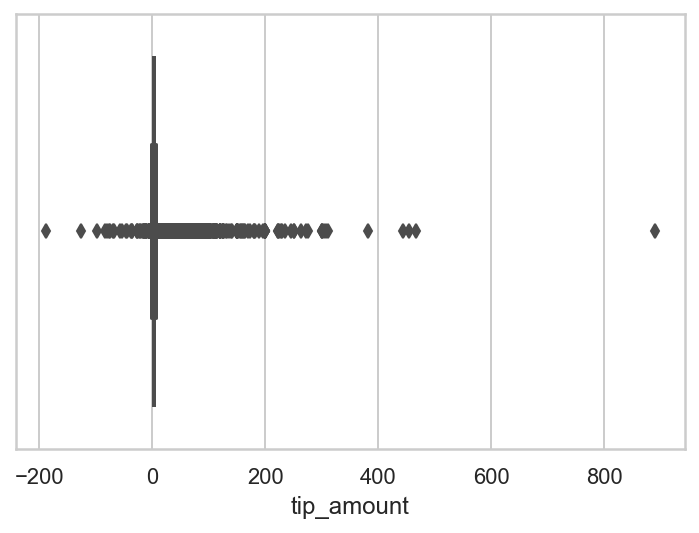

In [123]:
sns.boxplot(x=df.tip_amount)

<AxesSubplot:xlabel='tip_amount'>

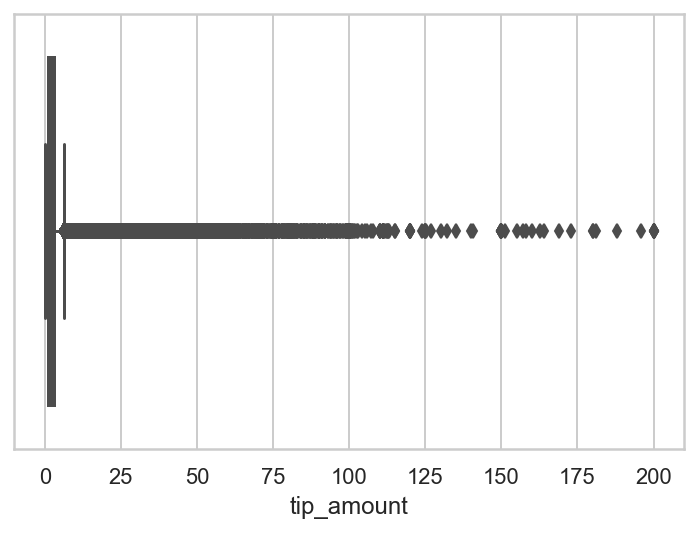

In [122]:
sns.boxplot(x=df[(df.tip_amount >= 0) & (df.tip_amount <= 200)]["tip_amount"])

In [21]:
df.tpep_pickup_datetime.value_counts().sort_index()

2003-01-01 00:10:06    1
2003-01-05 04:05:18    1
2008-12-31 22:23:09    1
2008-12-31 23:02:01    1
2008-12-31 23:02:04    1
                      ..
2022-05-15 20:45:16    1
2022-05-15 21:16:46    1
2022-05-18 20:17:19    1
2022-05-18 20:41:57    1
2022-05-24 17:41:50    1
Name: tpep_pickup_datetime, Length: 4607988, dtype: int64

In [22]:
df.tpep_dropoff_datetime.value_counts().sort_index()

2003-01-01 12:38:59    1
2003-01-05 18:41:11    1
2008-12-31 23:06:56    1
2008-12-31 23:15:42    1
2008-12-31 23:44:06    1
                      ..
2022-05-16 04:34:59    1
2022-05-16 20:38:57    1
2022-05-18 20:22:58    1
2022-05-18 20:47:45    1
2022-05-24 17:43:27    1
Name: tpep_dropoff_datetime, Length: 4606668, dtype: int64

In [31]:
df[df["tip_amount"] == -188.0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocation_Borough,PULocation_Zone,PULocation_service_zone,DOLocation_Borough,DOLocation_Zone,DOLocation_service_zone
4548276,2,2022-02-21 15:53:02,2022-02-21 16:04:15,1.0,0.96,1.0,N,48,186,4,-8.5,0.0,-0.5,-188.0,0.0,-0.3,-199.8,-2.5,0.0,Manhattan,Clinton East,Yellow Zone,Manhattan,Penn Station/Madison Sq West,Yellow Zone


In [37]:
df[df["total_amount"] == 401095.62]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocation_Borough,PULocation_Zone,PULocation_service_zone,DOLocation_Borough,DOLocation_Zone,DOLocation_service_zone
429859,1,2022-01-07 11:36:43,2022-01-07 11:47:12,1.0,3.3,1.0,N,107,140,4,401092.32,2.5,0.5,0.0,0.0,0.3,401095.62,2.5,0.0,Manhattan,Gramercy,Yellow Zone,Manhattan,Lenox Hill East,Yellow Zone


In [11]:
df[df["trip_distance"] == 53440.55]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocation_Borough,PULocation_Zone,PULocation_service_zone,DOLocation_Borough,DOLocation_Zone,DOLocation_service_zone
8054108,2,2022-03-24 13:56:56,2022-03-24 13:58:14,1.0,53440.55,5.0,N,193,193,1,26.55,0.0,0.5,5.47,0.0,0.3,34.77,0.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone


In [35]:
# Wie viele habe negative ammounts
df[df["total_amount"] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocation_Borough,PULocation_Zone,PULocation_service_zone,DOLocation_Borough,DOLocation_Zone,DOLocation_service_zone
154,2,2022-01-01 00:26:37,2022-01-01 00:39:35,1.0,7.38,1.0,N,132,265,4,-21.00,-0.5,-0.5,0.00,0.0,-0.3,-23.55,0.0,-1.25,Queens,JFK Airport,Airports,Unknown,None,None
521,2,2022-01-01 00:27:18,2022-01-01 00:40:50,1.0,5.14,1.0,N,152,48,4,-17.00,-0.5,-0.5,0.00,0.0,-0.3,-20.80,-2.5,0.00,Manhattan,Manhattanville,Boro Zone,Manhattan,Clinton East,Yellow Zone
523,2,2022-01-01 00:59:33,2022-01-01 01:14:09,4.0,5.37,5.0,N,50,265,2,-75.00,0.0,0.0,0.00,0.0,-0.3,-77.80,-2.5,0.00,Manhattan,Clinton West,Yellow Zone,Unknown,None,None
580,2,2022-01-01 00:16:58,2022-01-01 00:19:41,1.0,0.46,1.0,N,90,234,2,-4.00,-0.5,-0.5,0.00,0.0,-0.3,-7.80,-2.5,0.00,Manhattan,Flatiron,Yellow Zone,Manhattan,Union Sq,Yellow Zone
714,2,2022-01-01 00:29:12,2022-01-01 00:40:29,1.0,3.13,1.0,N,13,246,4,-12.00,-0.5,-0.5,0.00,0.0,-0.3,-15.80,-2.5,0.00,Manhattan,Battery Park City,Yellow Zone,Manhattan,West Chelsea/Hudson Yards,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9064310,2,2022-03-30 08:11:00,2022-03-30 08:12:00,NaN,0.08,NaN,None,79,79,0,-38.31,0.0,0.5,5.55,0.0,0.3,-29.46,NaN,NaN,Manhattan,East Village,Yellow Zone,Manhattan,East Village,Yellow Zone
9066657,2,2022-03-30 21:35:00,2022-03-30 21:37:00,NaN,0.15,NaN,None,146,7,0,-18.06,0.0,0.5,2.58,0.0,0.3,-14.68,NaN,NaN,Queens,Long Island City/Queens Plaza,Boro Zone,Queens,Astoria,Boro Zone
9067712,2,2022-03-31 07:41:00,2022-03-31 07:43:00,NaN,0.48,NaN,None,80,80,0,-55.27,0.0,0.5,9.63,0.0,0.3,-44.84,NaN,NaN,Brooklyn,East Williamsburg,Boro Zone,Brooklyn,East Williamsburg,Boro Zone
9068673,2,2022-03-31 12:29:31,2022-03-31 12:33:57,NaN,0.50,NaN,None,264,170,0,-35.40,0.0,0.5,10.00,0.0,0.3,-22.10,NaN,NaN,Unknown,NV,None,Manhattan,Murray Hill,Yellow Zone


In [23]:
df.passenger_count.describe()

count    8.780189e+06
mean     1.390163e+00
std      9.794085e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

The encoding for Paymant_type is different then to the docu.
In the docu it starts with 1, but here the data code starts from 0. I assume that 0=1, 1=2, and so forth

In [38]:
df.payment_type.value_counts()

1    6956059
2    1745160
0     291055
3      40417
4      38550
5          3
Name: payment_type, dtype: int64

99 is not defined for `RatecodeID`. 
Possible meaning: ?

In [32]:
df.RatecodeID.value_counts()

1     8407017
2      264023
5       48974
99      32477
3       16999
4       10628
6          71
Name: RatecodeID, dtype: int64

In [40]:
df[df["RatecodeID"] == 99.0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocation_Borough,PULocation_Zone,PULocation_service_zone,DOLocation_Borough,DOLocation_Zone,DOLocation_service_zone
3587,1,2022-01-01 00:10:40,2022-01-01 00:56:08,1.0,0.0,99.0,N,49,136,1,52.2,0.0,0.5,0.0,6.55,0.3,59.55,0.0,0.0,Brooklyn,Clinton Hill,Boro Zone,Bronx,Kingsbridge Heights,Boro Zone
8172,1,2022-01-01 01:11:42,2022-01-01 01:34:48,1.0,4.2,99.0,N,254,69,1,23.2,0.0,0.5,0.0,0.00,0.3,24.00,0.0,0.0,Bronx,Williamsbridge/Olinville,Boro Zone,Bronx,East Concourse/Concourse Village,Boro Zone
8173,1,2022-01-01 01:49:58,2022-01-01 02:12:27,1.0,5.1,99.0,N,213,41,1,23.2,0.0,0.5,0.0,0.00,0.3,24.00,0.0,0.0,Bronx,Soundview/Castle Hill,Boro Zone,Manhattan,Central Harlem,Boro Zone
8523,1,2022-01-01 01:02:36,2022-01-01 01:36:11,1.0,0.0,99.0,N,77,127,1,53.2,0.0,0.5,0.0,6.55,0.3,60.55,0.0,0.0,Brooklyn,East New York/Pennsylvania Avenue,Boro Zone,Manhattan,Inwood,Boro Zone
8524,1,2022-01-01 01:53:03,2022-01-01 02:06:10,1.0,1.6,99.0,N,74,238,1,15.2,0.0,0.5,0.0,0.00,0.3,16.00,0.0,0.0,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8946521,1,2022-03-31 22:20:42,2022-03-31 23:00:08,1.0,0.0,99.0,N,116,39,1,60.2,0.0,0.5,0.0,6.55,0.3,67.55,0.0,0.0,Manhattan,Hamilton Heights,Boro Zone,Brooklyn,Canarsie,Boro Zone
8947468,1,2022-03-31 22:35:26,2022-03-31 23:17:18,1.0,0.0,99.0,N,74,23,1,68.2,0.0,0.5,0.0,14.00,0.3,83.00,0.0,0.0,Manhattan,East Harlem North,Boro Zone,Staten Island,Bloomfield/Emerson Hill,Boro Zone
8947982,1,2022-03-31 22:03:26,2022-03-31 22:33:14,1.0,0.0,99.0,N,79,10,1,46.2,0.0,0.5,0.0,6.55,0.3,53.55,0.0,0.0,Manhattan,East Village,Yellow Zone,Queens,Baisley Park,Boro Zone
8950611,1,2022-03-31 23:27:38,2022-03-31 23:46:35,1.0,5.7,99.0,N,140,47,1,32.2,0.0,0.5,0.0,0.00,0.3,33.00,0.0,0.0,Manhattan,Lenox Hill East,Yellow Zone,Bronx,Claremont/Bathgate,Boro Zone


Data Quality summary:
- there are some strange datapoints
- since I have a lot of data I will remove these possible corrupt datapoints

### Data Cleaning
Strategy:
- `trip_distance` remove trips <= 0 and >= 100
- `trip_duration_sec` remove trips <= 30 and >= 14400 (4h)
- `total_amount` remove amounts <=0 and >= 400
- `tip_amount` remove tips <= 0 and >= 200
- `average_speed_km/h` remove average speed <1 und >=100
- `tpep_pickup_datetime` and `tpep_pickup_datetime` date != 2022 and month not in ['January', 'February', 'March']

In [47]:
df = df[(df.trip_distance > 0) & (df.trip_distance <= 100)]
df.shape

(8682684, 29)

In [48]:
df = df[(df.trip_duration_sec >= 30) & (df.trip_duration_sec <= 14400)]
df.shape

(8652067, 29)

In [49]:
df = df[(df.total_amount >= 0) & (df.total_amount <= 400)]
df.shape

(8613348, 29)

In [50]:
df = df[df.tip_amount <= 200]
df.shape

(8613338, 29)

<AxesSubplot:xlabel='average_speed_km/h'>

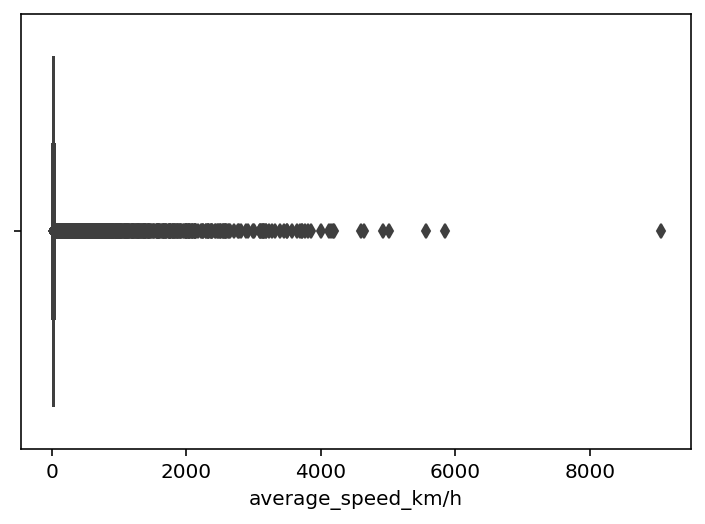

In [17]:
sns.boxplot(x=df['average_speed_km/h'])

<AxesSubplot:xlabel='average_speed_km/h'>

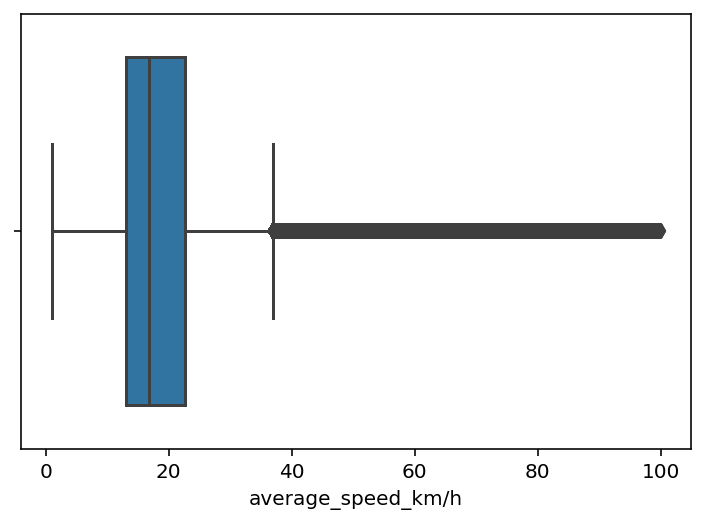

In [24]:
sns.boxplot(x=df[(df['average_speed_km/h'] >= 1) & (df['average_speed_km/h'] <= 100)]['average_speed_km/h'])

In [51]:
df = df[(df['average_speed_km/h'] >= 1) & (df['average_speed_km/h'] <= 100)]
df.shape

(8609011, 29)

In [56]:
df = df[df['tpep_pickup_datetime'].dt.year == 2022]
df.shape

(8608974, 29)

In [62]:
df = df[(df['tpep_pickup_datetime'].dt.month == 1) | (df['tpep_pickup_datetime'].dt.month == 2) | (df['tpep_pickup_datetime'].dt.month == 3)]
df.shape

(8608926, 29)

In [64]:
df = df[df['tpep_dropoff_datetime'].dt.month != 4]
df.shape

(8607976, 29)

In [65]:
# check values
for row in num_rows_list:
    print(f"{row}: min: {df[row].min()}, max: {df[row].max()}")

passenger_count: min: 0, max: 9
trip_distance: min: 0.01, max: 99.46
trip_duration: min: 0 days 00:00:30, max: 0 days 03:59:50
trip_duration_sec: min: 30.000000000000004, max: 14390.0
average_speed_km/h: min: 1.0017391304347825, max: 99.96859122401848
fare_amount: min: 0.0, max: 397.5
extra: min: 0.0, max: 33.5
mta_tax: min: 0.0, max: 17.1
tip_amount: min: 0.0, max: 200.0
improvement_surcharge: min: 0.0, max: 0.3
total_amount: min: 0.0, max: 399.55
congestion_surcharge: min: 0.0, max: 2.75
airport_fee: min: 0.0, max: 1.25
tpep_pickup_datetime: min: 2022-01-01 00:00:08, max: 2022-03-31 23:58:54
tpep_dropoff_datetime: min: 2022-01-01 00:04:57, max: 2022-03-31 23:59:59


In [66]:
# save clean data
df.to_parquet("NYC_clean_data.parpuet")

In [125]:
# clear all variables to free up memory space
%reset -f

## Prepare data for the Visualizations
- create indiviual datasets to quickly load relevent data for the visualizations

In [1]:
# imports
# relaod imports after reset
import pandas as pd
# turn off truncating display option
pd.set_option('display.max_columns', None)
import numpy as np

### Libs for viszalization
import matplotlib#
import matplotlib.pyplot as plt#

import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

import geopandas as gpd

In [2]:
# reload propocessed and clean data
df = pd.read_parquet("NYC_clean_data.parpuet")

### Number of Trips split by month, day and  hour

In [13]:
df_number_trips = df[['tpep_pickup_datetime']]
df_number_trips['month'] = df_number_trips.tpep_pickup_datetime.dt.month_name()
df_number_trips['day'] = df_number_trips.tpep_pickup_datetime.dt.day_name()
df_number_trips['hour'] = df_number_trips.tpep_pickup_datetime.dt.hour


<ipython-input-13-4b687acf1867>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_trips['month'] = df_number_trips.tpep_pickup_datetime.dt.month_name()
<ipython-input-13-4b687acf1867>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_trips['day'] = df_number_trips.tpep_pickup_datetime.dt.day_name()
<ipython-input-13-4b687acf1867>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [14]:
df_number_trips

,tpep_pickup_datetime,month,day,hour
0,2022-01-01 00:35:40,January,Saturday,0
1,2022-01-01 00:33:43,January,Saturday,0
2,2022-01-01 00:53:21,January,Saturday,0
3,2022-01-01 00:25:21,January,Saturday,0
4,2022-01-01 00:36:48,January,Saturday,0
...,...,...,...,...
8953424,2022-03-31 23:10:50,March,Thursday,23
8953425,2022-03-31 23:06:29,March,Thursday,23
8953426,2022-03-31 23:33:04,March,Thursday,23
8953427,2022-03-31 23:03:08,March,Thursday,23


In [15]:
df_number_trips.to_parquet('NYC_trips_count_data.parquet')

### Most commmon pickup and drop-off Locations

In [110]:
# count pickup locations
df_common_pickup_places = df['PULocationID'].value_counts()
df_common_pickup_places = df_common_pickup_places.reset_index()
df_common_pickup_places.rename(columns={'index': 'PULocationID', 'PULocationID': 'PU_count'}, inplace=True)

# count dropoff locations
df_common_dropoff_places = df['DOLocationID'].value_counts()
df_common_dropoff_places = df_common_dropoff_places.reset_index()
df_common_dropoff_places.rename(columns={'index': 'DOLocationID', 'DOLocationID': 'DO_count'}, inplace=True)

In [92]:
df_common_pickup_places

,PULocationID,PU_count
0,237,420479
1,236,393963
2,132,345873
3,161,344740
4,186,289044
...,...,...
253,105,2
254,27,2
255,30,2
256,99,1


In [93]:
df_common_dropoff_places

,DOLocationID,DO_count
0,236,405738
1,237,366407
2,161,296572
3,170,263239
4,141,255824
...,...,...
256,187,33
257,204,27
258,2,6
259,105,6


In [111]:
fp = "taxi_zones/taxi_zones.shp"
map_df = gpd.read_file(fp)

map_df

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824...."


#### Merge pickup and dropoff locations with gropandas file

In [112]:
df_location_merged = map_df.merge(df_common_pickup_places, left_on='LocationID', right_on='PULocationID')

In [113]:
df_location_merged = df_location_merged.merge(df_common_dropoff_places, left_on='LocationID', right_on='DOLocationID')

In [114]:
df_location_merged.sample(5)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,PU_count,DOLocationID,DO_count
216,225,0.088799,0.000311,Stuyvesant Heights,225,Brooklyn,"POLYGON ((1007155.288 188499.273, 1007196.203 ...",225,480,225,6972
89,92,0.117830,0.000375,Flushing,92,Queens,"POLYGON ((1032288.994 220089.809, 1032291.399 ...",92,221,92,3974
174,181,0.089537,0.000307,Park Slope,181,Brooklyn,"POLYGON ((990954.947 181851.707, 990815.590 18...",181,2305,181,21053
236,245,0.095983,0.000466,West Brighton,245,Staten Island,"POLYGON ((957085.564 172591.260, 957142.385 17...",245,4,245,80
47,48,0.043747,0.000094,Clinton East,48,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...",48,271656,48,238793


In [115]:
type(df_location_merged)

geopandas.geodataframe.GeoDataFrame

In [116]:
# df_location_merged.to_parquet("NYC_common_locations_data.parquet")
df_location_merged.to_file('NYC_common_locations_data.shp')  

<ipython-input-116-392b975b3a9c>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_location_merged.to_file('NYC_common_locations_data.shp')


### What is the most travled location from and to the airport?

In [100]:
df[(df['PULocation_service_zone'] == 'Airports') | (df['PULocation_service_zone'] == 'EWR')]['PULocation_Zone'].value_counts()

JFK Airport          345873
LaGuardia Airport    222910
Newark Airport          104
Name: PULocation_Zone, dtype: int64

In [119]:
df_airports = df[(df['PULocation_service_zone'] == 'Airports') | (df['PULocation_service_zone'] == 'EWR') | (df['DOLocation_service_zone'] == 'Airports') | (df['DOLocation_service_zone'] == 'EWR')]

In [123]:
df_airports.to_parquet("NYC_airports_data.parquet")

### What are the busiest routes?

In [128]:
df_zone_lookup = pd.read_csv("taxi+_zone_lookup.csv")

In [130]:
df_route = df[['PULocationID', 'PULocation_Borough', 'PULocation_Zone', 'DOLocationID', 'DOLocation_Borough', 'DOLocation_Zone']]
df_route = df_route.groupby(by=['PULocationID', 'DOLocationID']).count().reset_index().drop(columns=['PULocation_Zone', 'DOLocation_Borough', 'DOLocation_Zone'])
df_route.rename(columns={'PULocation_Borough': 'count'}, inplace=True)
df_route.sort_values('count', ascending=False, inplace=True)

In [131]:
df_route = df_route.merge(df_zone_lookup, left_on='PULocationID', right_on='LocationID')
df_route.drop(columns=['service_zone', 'LocationID'], inplace=True)

In [132]:
df_route.rename(columns={'Borough': 'PU_Borough', 'Zone': 'PU_Zone'}, inplace=True)

In [133]:
df_route = df_route.merge(df_zone_lookup, left_on='DOLocationID', right_on='LocationID')
df_route.drop(columns=['service_zone', 'LocationID'], inplace=True)
df_route.rename(columns={'Borough': 'DO_Borough', 'Zone': 'DO_Zone'}, inplace=True)

In [137]:
df_route.sort_values('count', ascending=False, inplace=True)

In [140]:
df_route.head(20)

,PULocationID,DOLocationID,count,PU_Borough,PU_Zone,DO_Borough,DO_Zone
0,237,236,61788,Manhattan,Upper East Side South,Manhattan,Upper East Side North
164,236,237,52640,Manhattan,Upper East Side North,Manhattan,Upper East Side South
1,236,236,41628,Manhattan,Upper East Side North,Manhattan,Upper East Side North
163,237,237,39146,Manhattan,Upper East Side South,Manhattan,Upper East Side South
7109,264,264,37950,Unknown,NV,Unknown,NV
2016,239,238,24263,Manhattan,Upper West Side South,Manhattan,Upper West Side North
325,237,161,24236,Manhattan,Upper East Side South,Manhattan,Midtown Center
1293,142,239,23599,Manhattan,Lincoln Square East,Manhattan,Upper West Side South
5,141,236,23512,Manhattan,Lenox Hill West,Manhattan,Upper East Side North
938,239,142,23450,Manhattan,Upper West Side South,Manhattan,Lincoln Square East


In [141]:
df_route['count'].sum()

8607976

In [142]:
df_route.to_parquet("NYC_route_data.parquet")

In [143]:
%reset -f